# Coursera Applied Data Science Capstone - José Victor Tobias
This notebook is used to solve the final project of the Applied Data Science Capstone course of Coursera.

In this notebook I am going to load the data and prepare for train various algoritms to find the model with the best accuracy for the solution.

## Importing the libraries

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression



## Getting the Data file for the project

In [2]:
!wget -O accident_severity.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-06 22:11:42--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘accident_severity.csv’

100%[======================================>] 73,917,638  42.5MB/s   in 1.7s   

2020-09-06 22:11:44 (42.5 MB/s) - ‘accident_severity.csv’ saved [73917638/73917638]



## Loading the Data with Pandas

In [3]:
df = pd.read_csv('accident_severity.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.shape

(194673, 38)

In [5]:
# we are going to drop the columns discarted for inspection and detailed in the document
df.drop(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 
         'REPORTNO', 'STATUS', 'INTKEY', 'EXCEPTRSNDESC', 
         'SEVERITYDESC', 'INCDATE', 'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLDESC'], 
        axis='columns', inplace=True)

In [6]:
df.shape

(194673, 24)

## Data Undestanding

In [7]:
#we have to check the column 33 that has the mixed types to see what is the values that we have
df['SPEEDING'].value_counts().to_frame()

,SPEEDING
Y,9333


In [8]:
df.describe()

,SEVERITYCODE,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.946730e+05
mean,1.298901,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,269.401114,9.782452e+03
std,0.457778,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,3315.776055,7.226926e+04
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,0.000000,0.000000e+00
50%,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,0.000000,0.000000e+00
75%,2.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,0.000000,0.000000e+00
max,2.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,525241.000000,5.239700e+06


In [9]:
#finding the missing values
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLCODE
False    194673
Name: SDOT_COLCODE, dtype: int64

INATTENTIONIND
True     164868
False     29805
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    189789
True       4884
Name: UNDERINF

In [10]:
# Because EXCEPTRSNCODE,INATTENTIONIND and PEDROWNOTGRNT have a lot of missing data and there’s no description in the metadata file, we are going to drop the column.
df.drop(['EXCEPTRSNCODE', 'SPEEDING', 'INATTENTIONIND','PEDROWNOTGRNT'], axis='columns', inplace=True)

In [11]:
#analyzing the values of the missing data in the values:
columns_missing_values = ['ADDRTYPE', 'LOCATION', 'COLLISIONTYPE', 'JUNCTIONTYPE', 
   'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE']
for column in columns_missing_values:
    print(df[column].value_counts())

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N                          276
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB                          271
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N                                265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                                          254
6TH AVE AND JAMES ST                                                                    252
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST                                          239
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP                238
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST                                   231
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP    212
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP

In [12]:
#checking data types
df.dtypes

SEVERITYCODE       int64
ADDRTYPE          object
LOCATION          object
SEVERITYCODE.1     int64
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDTTM           object
JUNCTIONTYPE      object
SDOT_COLCODE       int64
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
ST_COLCODE        object
SEGLANEKEY         int64
CROSSWALKKEY       int64
HITPARKEDCAR      object
dtype: object

In [13]:
#converting INCDTTM to datetime
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,Intersection,5TH AVE NE AND NE 103RD ST,2,Angles,2,0,0,2,2013-03-27 14:54:00,At Intersection (intersection related),11,N,Overcast,Wet,Daylight,10,0,0,N
1,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,Sideswipe,2,0,0,2,2006-12-20 18:55:00,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,0,0,N
2,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,Parked Car,4,0,0,3,2004-11-18 10:20:00,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,0,0,N
3,1,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,1,Other,3,0,0,3,2013-03-29 09:26:00,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,23,0,0,N
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,2,Angles,2,0,0,2,2004-01-28 08:04:00,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,0,0,N


In [14]:
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



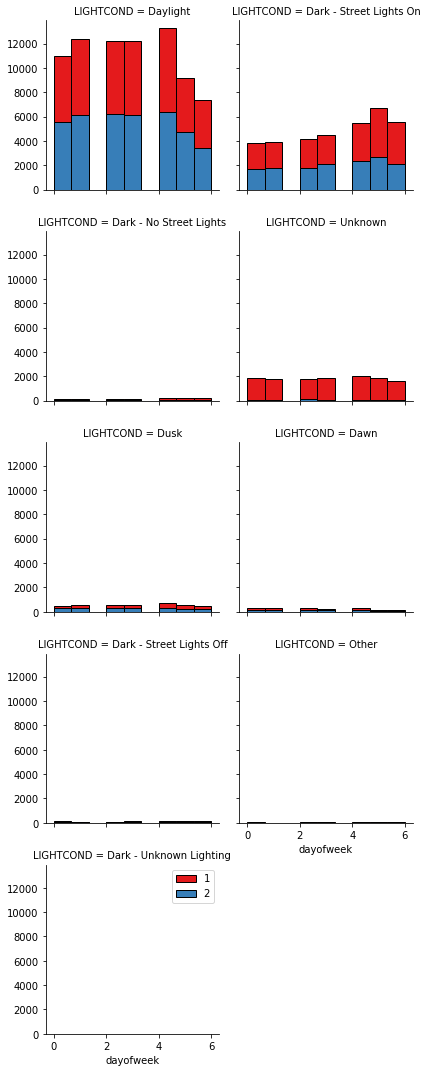

In [15]:
#we are going to check if there is some influence if the incident occurs in the weekend of if the hour is relevant
df['dayofweek'] = df['INCDTTM'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="LIGHTCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

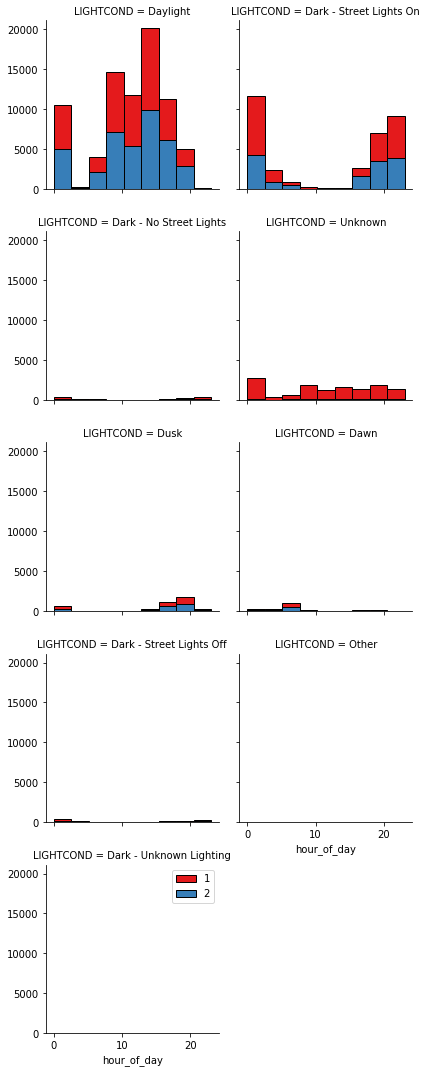

In [16]:
df['hour_of_day'] = df['INCDTTM'].dt.hour
bins = np.linspace(df.hour_of_day.min(), df.hour_of_day.max(), 10)
g = sns.FacetGrid(df, col="LIGHTCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'hour_of_day', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [17]:
df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,dayofweek,hour_of_day
0,2,Intersection,5TH AVE NE AND NE 103RD ST,2,Angles,2,0,0,2,2013-03-27 14:54:00,...,N,Overcast,Wet,Daylight,10,0,0,N,2,14
1,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,Sideswipe,2,0,0,2,2006-12-20 18:55:00,...,0,Raining,Wet,Dark - Street Lights On,11,0,0,N,2,18
2,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,Parked Car,4,0,0,3,2004-11-18 10:20:00,...,0,Overcast,Dry,Daylight,32,0,0,N,3,10
3,1,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,1,Other,3,0,0,3,2013-03-29 09:26:00,...,N,Clear,Dry,Daylight,23,0,0,N,4,9
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,2,Angles,2,0,0,2,2004-01-28 08:04:00,...,0,Raining,Wet,Daylight,10,0,0,N,2,8


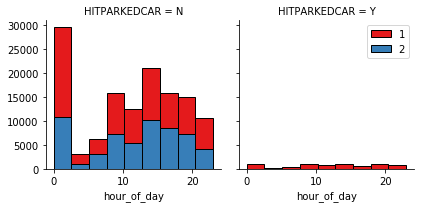

In [18]:
bins = np.linspace(df.hour_of_day.min(), df.hour_of_day.max(), 10)
g = sns.FacetGrid(df, col="HITPARKEDCAR", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'hour_of_day', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [19]:
#drop the INCDTTM column, because, it is not necessary any more
df.drop(['INCDTTM'], axis='columns', inplace=True)

In [20]:
df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,dayofweek,hour_of_day
0,2,Intersection,5TH AVE NE AND NE 103RD ST,2,Angles,2,0,0,2,At Intersection (intersection related),...,N,Overcast,Wet,Daylight,10,0,0,N,2,14
1,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),...,0,Raining,Wet,Dark - Street Lights On,11,0,0,N,2,18
2,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,Parked Car,4,0,0,3,Mid-Block (not related to intersection),...,0,Overcast,Dry,Daylight,32,0,0,N,3,10
3,1,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,1,Other,3,0,0,3,Mid-Block (not related to intersection),...,N,Clear,Dry,Daylight,23,0,0,N,4,9
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,2,Angles,2,0,0,2,At Intersection (intersection related),...,0,Raining,Wet,Daylight,10,0,0,N,2,8


## Data Transformation and pre-processing
In the fase, we are going to clean the data, change data types and prepare the data to processing

In [21]:
#replacing the Unknown values for NaN JUNCTIONTYPE, ROADCOND, ST_COLCODE and ST_COLCODE has a blank space as value
df["JUNCTIONTYPE"].replace("Unknown", np.nan, inplace=True)
df["ROADCOND"].replace("Unknown", np.nan, inplace=True)
df["LIGHTCOND"].replace("Unknown", np.nan, inplace=True)
df["ST_COLCODE"].replace("Unknown", np.nan, inplace=True)
df["ST_COLCODE"].replace(" ", np.nan, inplace=True)

In [22]:
#replacing missing values with the most common values in the data set: 
df["ADDRTYPE"].replace(np.nan, 'Block', inplace=True)
df["JUNCTIONTYPE"].replace(np.nan, 'Mid-Block (not related to intersection)', inplace=True)
df["UNDERINFL"].replace(np.nan, 0, inplace=True)
df["WEATHER"].replace(np.nan, 'Clear', inplace=True)
df["ROADCOND"].replace(np.nan, 'Dry', inplace=True)
df["LIGHTCOND"].replace(np.nan, 'Daylight', inplace=True)

In [23]:
#change categorical values
df["UNDERINFL"] = df['UNDERINFL'].astype('object')
df["CROSSWALKKEY"] = df['CROSSWALKKEY'].astype('object')
df["HITPARKEDCAR"] = df['HITPARKEDCAR'].astype('object')
df['UNDERINFL'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
df['CROSSWALKKEY'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
df['HITPARKEDCAR'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)

In [24]:
#change datatypes
df["UNDERINFL"] = df['UNDERINFL'].astype('int')
df["CROSSWALKKEY"] = df['CROSSWALKKEY'].astype('int')
df["HITPARKEDCAR"] = df['HITPARKEDCAR'].astype('int')
df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,dayofweek,hour_of_day
0,2,Intersection,5TH AVE NE AND NE 103RD ST,2,Angles,2,0,0,2,At Intersection (intersection related),...,0,Overcast,Wet,Daylight,10,0,0,0,2,14
1,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),...,0,Raining,Wet,Dark - Street Lights On,11,0,0,0,2,18
2,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,Parked Car,4,0,0,3,Mid-Block (not related to intersection),...,0,Overcast,Dry,Daylight,32,0,0,0,3,10
3,1,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,1,Other,3,0,0,3,Mid-Block (not related to intersection),...,0,Clear,Dry,Daylight,23,0,0,0,4,9
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,2,Angles,2,0,0,2,At Intersection (intersection related),...,0,Raining,Wet,Daylight,10,0,0,0,2,8


In [25]:
#in the case of location we are going to drop the detailed location because it is not relevant in the model and can add bias
df.drop(['LOCATION'], axis='columns', inplace=True)

In [26]:
#checking values for COLLISIONTYPE
df["COLLISIONTYPE"].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [27]:
#because there is no relevant of more common value, we need to drop the values (the missing values are under the 5%)
df.dropna(inplace=True)

In [28]:
#drop the duplicated SEVERITYCODE.1
df.drop(['SEVERITYCODE.1'], axis='columns', inplace=True)
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,dayofweek,hour_of_day
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,Overcast,Wet,Daylight,10,0,0,0,2,14
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,0,0,0,2,18
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,0,0,0,3,10
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,0,Clear,Dry,Daylight,23,0,0,0,4,9
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,0,0,0,2,8


In [29]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    189769
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    189769
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    189769
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    189769
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    189769
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    189769
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    189769
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    189769
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLCODE
False    189769
Name: SDOT_COLCODE, dtype: int64

UNDERINFL
False    189769
Name: UNDERINFL, dtype: int64

WEATHER
False    189769
Name: WEATHER, dtype: int64

ROADCOND
False    189769
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189769
Name: LIGHTCOND, dtype: int64

ST_COLCODE
False    189769
Name: ST_COLCODE, dtype: int64

SEGLANEKEY
False    189769
Name: SEGLANEKEY, dtype: int64

CROSSWALKKEY
False    189769
Name: CROSSWALKKEY, dtype: int64

HITPARKEDCAR
False    189769
Name: HITPARKEDCAR, dtype: 

In [30]:
#now, we are goint to check the remaining data values:
for column in df.columns.values.tolist():
    print(df[column].value_counts())

1    132622
2     57147
Name: SEVERITYCODE, dtype: int64
Block           125477
Intersection     63545
Alley              747
Name: ADDRTYPE, dtype: int64
Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64
2     111387
3      35138
4      14445
1      11727
5       6584
0       5541
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1


In [31]:
#checking the final shape of the dataset
df.shape

(189769, 19)

In [33]:
#now all the data is prepared, so, we are going to construct the final features set:
Features = df.copy()
Features.drop(['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SEVERITYCODE'], axis='columns', inplace=True)
Features.shape

(189769, 12)

In [37]:
#getting the binary data for the categorical values with a hot fix
Features = pd.concat([Features,pd.get_dummies(df['ADDRTYPE'])], axis=1)
Features = pd.concat([Features,pd.get_dummies(df['COLLISIONTYPE'])], axis=1)
Features = pd.concat([Features,pd.get_dummies(df['JUNCTIONTYPE'])], axis=1)
Features = pd.concat([Features,pd.get_dummies(df['WEATHER'])], axis=1)
Features = pd.concat([Features,pd.get_dummies(df['ROADCOND'])], axis=1)
Features = pd.concat([Features,pd.get_dummies(df['LIGHTCOND'])], axis=1)

In [42]:
# checking the final shape of the dataset
Features.shape

(189769, 58)

In [43]:
Features.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,UNDERINFL,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,...,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other
0,2,0,0,2,11,0,10,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,2,0,0,2,16,0,11,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,4,0,0,3,14,0,32,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,0,0,3,11,0,23,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,2,11,0,10,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [44]:
#preparing the data to processing:
y = df['SEVERITYCODE'].values
X = Features
X = preprocessing.StandardScaler().fit(X).transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: Data with input dtype uint8, int64, object were all converted to float64 by StandardScaler.


In [45]:
X[0:5]

array([[-0.3387597 , -0.18992285, -0.17156939,  0.05328069, -0.42685757,
        -0.22468788, -0.8857722 , -0.08152522, -0.13617465, -0.19448067,
        -0.49072499,  0.36721959, -0.06286431, -1.39702313,  1.40938705,
         2.11493452, -0.17138505, -0.10382957, -0.27897808, -0.37779943,
        -0.5817699 , -0.18994091, -0.46794896, -0.12579074, -0.32973146,
        -0.10475893,  1.44730166, -0.24247811, -0.36572493, -0.98343788,
        -0.0292301 , -0.01718088, -1.19131312, -0.05483976, -0.06635951,
         2.41844752, -0.00513308, -0.45996447, -0.01147852, -0.02440933,
        -0.0692997 , -0.29390613, -1.67053272, -0.08004008, -0.01836752,
        -0.02638308, -0.019884  , -0.07292998, -0.02462453,  1.73152159,
        -0.09033327, -0.07973946, -0.58596475, -0.00761371, -0.11556466,
         0.67903443, -0.17914708, -0.03521197],
       [-0.3387597 , -0.18992285, -0.17156939,  0.05328069,  0.30253009,
        -0.22468788, -0.81688245, -0.08152522, -0.13617465, -0.19448067,
   

In [46]:
y[0:5]

array([2, 1, 1, 1, 2])

In [47]:
X.shape

(189769, 58)

In [48]:
y.shape

(189769,)

## Modeling (Week 2)